# Homework-4 Instructions:

* Your answers to this homework should be based on the adult-with-pii.csv dataset [here](https://raw.githubusercontent.com/um-dsp/CIS545/main/adult-with-pii.csv) that was also used for our demos. Do not modify this dataset because if you do so, some of your answers may change accordigly.

* Work out your answers to the 4 parts within this notebook and submit LastName1-LastName2-HW2.ipynb.

* You don't need to submit adult-with-pii.csv.

* Group size:  2.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import pandas as pd
import numpy as np

/var/folders/6f/xfmchx5n0qn1b_ydx_1qmm9h0000gn/T/ipykernel_59054/1897773601.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [2]:
census_data = census = pd.read_csv("https://raw.githubusercontent.com/um-dsp/CIS545/main/adult-with-pii.csv")
census_data.columns

Index(['Name', 'DOB', 'SSN', 'Zip', 'Age', 'Workclass', 'fnlwgt', 'Education',
       'Education-Num', 'Marital Status', 'Occupation', 'Relationship', 'Race',
       'Sex', 'Capital Gain', 'Capital Loss', 'Hours per week', 'Country',
       'Target'],
      dtype='object')

In [3]:
census_data.head()

,Name,DOB,SSN,Zip,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,Karrie Trusslove,9/7/1967,732-14-6110,64152,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Brandise Tripony,6/7/1988,150-19-2766,61523,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Brenn McNeely,8/6/1991,725-59-9860,95668,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Dorry Poter,4/6/2009,659-57-4974,25503,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Dick Honnan,9/16/1951,220-93-3811,75387,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Let's remove PII
census_de_ident = census_data.drop(columns = ['Name', 'SSN'])
census_de_ident.head()
census_de_ident.shape

(32561, 17)

In [5]:
# Show PII only
pii = census_data[['Name', 'DOB', 'SSN','Zip']]
pii.head()

,Name,DOB,SSN,Zip
0,Karrie Trusslove,9/7/1967,732-14-6110,64152
1,Brandise Tripony,6/7/1988,150-19-2766,61523
2,Brenn McNeely,8/6/1991,725-59-9860,95668
3,Dorry Poter,4/6/2009,659-57-4974,25503
4,Dick Honnan,9/16/1951,220-93-3811,75387


# Part 1: Linkage Attack (10pts.)

Given dataframes pii and census_de_ident, perform a linkange attack to recover the names of as many individuals as you can in census_de_ident. How many names are you able to recover?

In [8]:
# Here, write your code to perform the linkage attack and determine how many unique names could be identified
merged_df = census_de_ident.merge(pii, on=['DOB', 'Zip'], how='inner')



In [9]:
merged_df.head()

,DOB,Zip,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target,Name,SSN
0,9/7/1967,64152,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Karrie Trusslove,732-14-6110
1,6/7/1988,61523,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Brandise Tripony,150-19-2766
2,8/6/1991,95668,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Brenn McNeely,725-59-9860
3,4/6/2009,25503,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Dorry Poter,659-57-4974
4,9/16/1951,75387,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Dick Honnan,220-93-3811


In [10]:
num_recovered_names = len(merged_df['Name'].unique())

In [12]:
print(f"Number of unique names recovered: {num_recovered_names}")

Number of unique names recovered: 32560


# Part 2: k-Anonymity (10pts)

Implement a function check_k_anonymous that accepts k, list of QIDs (DOB, Zip), and a dataframe (a subset of census_de_ident) and checks whether the given dataframe satisfies k-anonymity or not. Test your code on 5 subsets of census_de_ident for five distinct values of k. 

**Note**:The code demo we did in our last lecture has all the ingredients you need for this question. 

In [13]:
import pandas as pd

# Create a sample dataframe using your `census_de_ident` subset
df = pd.DataFrame(census_de_ident)

In [14]:
def check_k_anonymous (df, qids, k):
    # Group the dataframe by the quasi-identifiers (QIDs)
    grouped = df.groupby(qids)
    
    # Check if any group has less than k records
    less_than_k = grouped.size() < k
    
    # If any group has less than k records, it violates k-anonymity
    return not less_than_k.any()

In [18]:
qids = ['DOB', 'Zip']
k_values = [1, 2, 3, 4, 7]  # Different values of k to test
for k in k_values:
    # Check if the subset satisfies k-anonymity for the given QIDs and k
    result = check_k_anonymous(df, qids, k)
    
    if result:
        print(f"The dataset is {k}-anonymous.")
    else:
        print(f"The dataset is not {k}-anonymous.")

The dataset is 1-anonymous.
The dataset is not 2-anonymous.
The dataset is not 3-anonymous.
The dataset is not 4-anonymous.
The dataset is not 7-anonymous.


# Use the following utilities for Part 3 and Part 4

In [19]:
# useful uitilities
def laplace_mechanism(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

def gaussian_mechanism(v, sensitivity, epsilon, delta):
    return v + np.random.normal(loc=0, scale=sensitivity * np.sqrt(2*np.log(1.25/delta)) / epsilon)

def percentage_error(original, private):
    return np.abs(original - private)*1.0/original * 100.0

# Part 3: Differentially private marital status counts (10pts.)

Using both $laplace\_mechanism()$ and $gaussian\_meshanism()$ given above, write a differentially private response to the query: 

 "What is the count of each type of marital status?"

In [20]:
# your code goes here

# Calculate the count of each marital status
marital_status_counts = census_de_ident['Marital Status'].value_counts()

# Differential privacy parameters
epsilon = 1.0

# Apply Laplace mechanism to the counts
laplace_noisy_counts = laplace_mechanism(marital_status_counts, 1, epsilon)

# Apply Gaussian mechanism to the counts
delta = 0.01  # Delta parameter for Gaussian mechanism
gaussian_noisy_counts = gaussian_mechanism(marital_status_counts, 1, epsilon, delta)

# Print the noisy counts
print("Laplace Noisy Counts:")
print(laplace_noisy_counts)

print("Gaussian Noisy Counts:")
print(gaussian_noisy_counts)


Laplace Noisy Counts:
Marital Status
Married-civ-spouse       14977.302391
Never-married            10684.302391
Divorced                  4444.302391
Separated                 1026.302391
Widowed                    994.302391
Married-spouse-absent      419.302391
Married-AF-spouse           24.302391
Name: count, dtype: float64
Gaussian Noisy Counts:
Marital Status
Married-civ-spouse       14977.504193
Never-married            10684.504193
Divorced                  4444.504193
Separated                 1026.504193
Widowed                    994.504193
Married-spouse-absent      419.504193
Married-AF-spouse           24.504193
Name: count, dtype: float64


# Part 4 : Differentially private average hours per week (20pts.)

Write code to return the differentially private average of "Hours per week". Use both $laplace\_mechanism()$ and $gaussian\_meshanism()$ given above. Plot and compare histograms of both mechanisms over 1000 samplings. For both mechanisms, your code should also use $percentage\_error()$ to determine the average error introduced as a result of differentially private output.

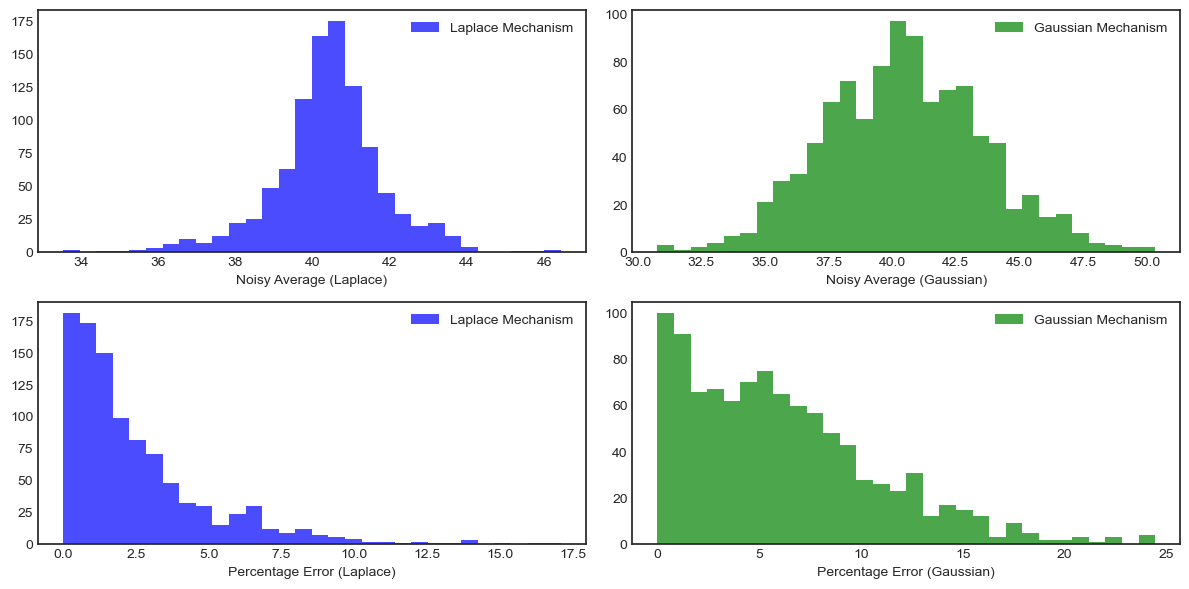

In [21]:
# your code goes here
# Define a function to calculate percentage error

# Number of samplings
num_samples = 1000

# True average hours per week
true_average = census_de_ident['Hours per week'].mean()

# Differential privacy parameters
epsilon = 1.0
delta = 0.01

# Initialize lists to store noisy averages and percentage errors
laplace_noisy_averages = []
gaussian_noisy_averages = []
laplace_percentage_errors = []
gaussian_percentage_errors = []

# Perform samplings and calculate noisy averages and percentage errors
for _ in range(num_samples):
    # Sample the data
    sample_data = census_de_ident.sample(frac=0.1, replace=True)
    
    # Calculate the average hours per week in the sample
    sample_average = sample_data['Hours per week'].mean()
    
    # Apply Laplace mechanism to the sample average
    laplace_noisy_avg = laplace_mechanism(sample_average, 1, epsilon)
    
    # Apply Gaussian mechanism to the sample average
    gaussian_noisy_avg = gaussian_mechanism(sample_average, 1, epsilon, delta)
    
    # Calculate percentage errors
    laplace_error = percentage_error(true_average, laplace_noisy_avg)
    gaussian_error = percentage_error(true_average, gaussian_noisy_avg)
    
    # Append results to lists
    laplace_noisy_averages.append(laplace_noisy_avg)
    gaussian_noisy_averages.append(gaussian_noisy_avg)
    laplace_percentage_errors.append(laplace_error)
    gaussian_percentage_errors.append(gaussian_error)

# Plot histograms
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(laplace_noisy_averages, bins=30, color='blue', alpha=0.7, label='Laplace Mechanism')
plt.xlabel('Noisy Average (Laplace)')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(gaussian_noisy_averages, bins=30, color='green', alpha=0.7, label='Gaussian Mechanism')
plt.xlabel('Noisy Average (Gaussian)')
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(laplace_percentage_errors, bins=30, color='blue', alpha=0.7, label='Laplace Mechanism')
plt.xlabel('Percentage Error (Laplace)')
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(gaussian_percentage_errors, bins=30, color='green', alpha=0.7, label='Gaussian Mechanism')
plt.xlabel('Percentage Error (Gaussian)')
plt.legend()

plt.tight_layout()
plt.show()
